In [1]:
from ibapi.client import EClient 
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import numpy as np
import time 
import threading 

listOfTickers = ["AAPL", "MSFT", "AMZN", "FB", "TSLA"]

class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def error(self, reqId, errorCode, errorString):
        print("reqId: {}, errorCode: {}, errorString {}".format(reqId, errorCode, errorString))
        
    def contractDetails(self, reqId, contractDetails):
        print("reqId: {}, contract: {}".format(reqId, contractDetails))
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
#             self.data[reqId] = [{"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume}]
            self.data[reqId] = [{"date": bar.date, "close": bar.close}]
            print(bar.date, bar.close)
        else:
#             self.data[reqId].append({"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume})
            self.data[reqId].append({"date": bar.date, "close": bar.close})
        
def ts_delay(var, lookback):
    rolled = np.roll(var, lookback)
    zero_ver = np.zeros(len(var))
    index_array = np.arange(len(var))
    final_array = np.where(index_array < lookback, np.nan, rolled)
    return final_array

def makeNasdaqContract(symbol, secType = "STK", exchange = "SMART", primaryExchange = "NASDAQ", currency = "USD"):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.primaryExchange = primaryExchange
    contract.currency = currency
    return contract

def getHistData(reqId, 
                contract, 
                durationStr,
                barSizeSetting, 
                whatToShow, 
                endDateTime = "", 
                useRTH = 1, 
                formatDate = 1, 
                keepUpToDate = 0,
                chartOptions = []):
    
    app.reqHistoricalData(reqId = reqId,
                          contract = contract,
                          endDateTime = endDateTime,
                          durationStr = durationStr,
                          barSizeSetting = barSizeSetting,
                          whatToShow = whatToShow,
                          useRTH = useRTH,
                          formatDate = formatDate,
                          keepUpToDate = keepUpToDate,
                          chartOptions = chartOptions)
    
def getHistDataMultiple(lst, time = "1 M", granularity = "5 mins", infoType = "MIDPOINT"):
    for i in range(len(lst)):
        ticker = lst[i]
        getHistData(i, makeNasdaqContract(ticker), time, granularity, infoType)
    return 0;


    
def socketConnection():
    app.run()
            
app = App()

app.connect("127.0.0.1", 7497, 1)

#START CONNECTION
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

getHistDataMultiple(listOfTickers, "1 M", "1 min", "MIDPOINT")

time.sleep(120)
#END CONNECTION
app.disconnect()

reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:hfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm.nj
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:eufarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:jfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfuture
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cashfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cafarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:euhmds
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds.nj
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:fundfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds
reqId: -1, errorCode: 2158

In [2]:
app.data

{0: [{'date': '20210819  09:30:00', 'close': 145.63},
  {'date': '20210819  09:31:00', 'close': 146.215},
  {'date': '20210819  09:32:00', 'close': 146.025},
  {'date': '20210819  09:33:00', 'close': 145.995},
  {'date': '20210819  09:34:00', 'close': 145.965},
  {'date': '20210819  09:35:00', 'close': 146.19},
  {'date': '20210819  09:36:00', 'close': 145.56},
  {'date': '20210819  09:37:00', 'close': 145.235},
  {'date': '20210819  09:38:00', 'close': 145.145},
  {'date': '20210819  09:39:00', 'close': 145.06},
  {'date': '20210819  09:40:00', 'close': 144.815},
  {'date': '20210819  09:41:00', 'close': 144.885},
  {'date': '20210819  09:42:00', 'close': 144.895},
  {'date': '20210819  09:43:00', 'close': 145.055},
  {'date': '20210819  09:44:00', 'close': 145.415},
  {'date': '20210819  09:45:00', 'close': 145.335},
  {'date': '20210819  09:46:00', 'close': 145.71},
  {'date': '20210819  09:47:00', 'close': 145.795},
  {'date': '20210819  09:48:00', 'close': 145.38},
  {'date': '202

In [5]:
import pandas as pd
pd.DataFrame.from_dict(app.data[0])


def convertToDataFrame(tradeObject, tickers):
    df_dict = {}
    for ticker in tickers:
        df_dict[ticker] = pd.DataFrame(tradeObject.data[tickers.index(ticker)])
        df_dict[ticker].set_index("date", inplace = True)
    return df_dict

data_vers = convertToDataFrame(app, listOfTickers)

In [6]:
data_vers

{'AAPL':                       close
 date                       
 20210819  09:30:00  145.630
 20210819  09:31:00  146.215
 20210819  09:32:00  146.025
 20210819  09:33:00  145.995
 20210819  09:34:00  145.965
 ...                     ...
 20210917  15:55:00  146.095
 20210917  15:56:00  146.065
 20210917  15:57:00  146.095
 20210917  15:58:00  146.165
 20210917  15:59:00  146.015
 
 [8190 rows x 1 columns],
 'MSFT':                       close
 date                       
 20210819  09:30:00  289.545
 20210819  09:31:00  290.175
 20210819  09:32:00  289.820
 20210819  09:33:00  289.705
 20210819  09:34:00  290.105
 ...                     ...
 20210917  15:55:00  299.880
 20210917  15:56:00  299.930
 20210917  15:57:00  300.190
 20210917  15:58:00  300.440
 20210917  15:59:00  299.815
 
 [8190 rows x 1 columns],
 'AMZN':                        close
 date                        
 20210819  09:30:00  3211.585
 20210819  09:31:00  3210.895
 20210819  09:32:00  3206.350
 20210819  09:33

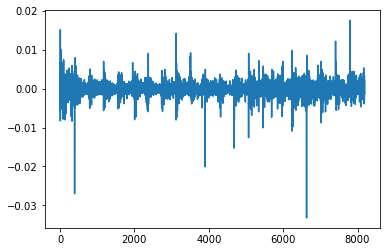

In [7]:
import matplotlib.pyplot as plt
numpy_verAAPL = pd.DataFrame.to_numpy(data_vers["AAPL"]).reshape(1,8190)
numpy_verMSFT = pd.DataFrame.to_numpy(data_vers["MSFT"]).reshape(1,8190)
numpy_verAMZN = pd.DataFrame.to_numpy(data_vers["AMZN"]).reshape(1,8190)
numpy_verFB = pd.DataFrame.to_numpy(data_vers["FB"]).reshape(1,8190)
numpy_verTSLA = pd.DataFrame.to_numpy(data_vers["TSLA"]).reshape(1,8190)
top_five = np.vstack((numpy_verAAPL, numpy_verMSFT, numpy_verAMZN, numpy_verFB, numpy_verTSLA))


def ts_delay(var, days):
    if days > 0:
        rolled = np.roll(var, days)
        rolled[:, :days] = np.nan
        return rolled
    else:
        rolled = np.roll(var, days)
        rolled[:, days:] = np.nan
        return rolled
    
def rev(var, days):
    ret = (var - ts_delay(var, days))/(ts_delay(var, days))
    return -ret

future_returns = (ts_delay(top_five, -1) - top_five)/top_five

correct = (np.sign(rev(top_five, 1) * future_returns)) * abs(future_returns)

summed = np.sum(correct, axis = 0)
plt.plot(summed)
plt.show()

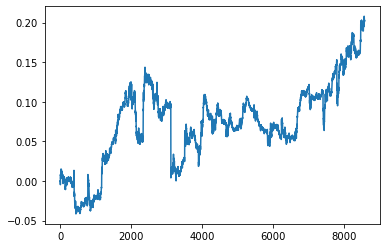

In [104]:
import matplotlib.pyplot as plt
import numpy as np

close = numpy_verAAPL

def returnRev(var, minutes, momentum = False):
    close = var
    if not momentum:
        reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        return np.cumsum(np.nan_to_num(reversion_pnl))
    else:
        reversion = ((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        return np.cumsum(np.nan_to_num(reversion_pnl))
    
def makeAndTestReversion(var, minutes, momentum = False):
    close = var
    if not momentum:
        reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
        plt.show()
    else:
        reversion = ((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
        plt.show()

    
# def makeAndTestMomentum(var, minutes):
#     close = var
#     reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
#     future_returns = (ts_delay(close, -1) - close)/close
#     reversion = np.sign(reversion)
#     reversion_pnl = reversion * future_returns
#     plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
#     plt.show()
# close = numpy_verAAPL
# reversion = -((close - ts_delay(close, 1))/ts_delay(close, 1)
# future_returns = (ts_delay(close, -1) - close)/close
# reversion = np.sign(reversion)
# reversion_pnl = reversion * future_returns

# plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
# plt.show()

# np.cumsum(reversion_pnl).shape
# reversion_pnl.shape
# np.cumsum(reversion_pnl).reshape(1, 8190)
# np.cumsum(reversion_pnl)
                  
# makeAndTestReversion(numpy_verTSLA, 1, True)

# plt.plot(returnRev(numpy_verTSLA, 1, True))
# plt.show()
# numpy_verAAPL = pd.DataFrame.to_numpy(data_vers["AAPL"]).reshape(1,8190)
# numpy_verMSFT = pd.DataFrame.to_numpy(data_vers["MSFT"]).reshape(1,8190)
# numpy_verAMZN = pd.DataFrame.to_numpy(data_vers["AMZN"]).reshape(1,8190)
# numpy_verFB = pd.DataFrame.to_numpy(data_vers["FB"]).reshape(1,8190)
# numpy_verTSLA

# makeAndTestReversion(numpy_verAAPL, 1, True)
# makeAndTestReversion(numpy_verMSFT, 1, True)
# makeAndTestReversion(numpy_verAMZN, 1, False)
#makeAndTestReversion(numpy_verFB, 1, False)
# makeAndTestReversion(numpy_verTSLA, 1, True)

# alpha = returnRev(numpy_verAAPL, 1, True) + returnRev(numpy_verMSFT, 1, True) + returnRev(numpy_verAMZN, 1, False) + returnRev(numpy_verFB, 1, False) + returnRev(numpy_verTSLA, 1, True)
alpha = returnRev(numpy_verAAPL, 1, True) + returnRev(numpy_verMSFT, 1, True) + returnRev(numpy_verAMZN, 1, True) + returnRev(numpy_verFB, 1, True) + returnRev(numpy_verTSLA, 1, True)
plt.plot(alpha)
plt.show()

In [10]:
)top_five.shape

(5, 8190)

In [89]:
from ibapi.client import EClient 
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import numpy as np
import time 
import threading 

listOfTickers = ["AAPL", "MSFT", "AMZN", "FB", "TSLA"]

class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def error(self, reqId, errorCode, errorString):
        print("reqId: {}, errorCode: {}, errorString {}".format(reqId, errorCode, errorString))
        
    def contractDetails(self, reqId, contractDetails):
        print("reqId: {}, contract: {}".format(reqId, contractDetails))
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
#             self.data[reqId] = [{"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume}]
            self.data[reqId] = [{"date": bar.date, "close": bar.close}]
            print(bar.date, bar.close)
        else:
#             self.data[reqId].append({"date": bar.date, "open": bar.open, "high": bar.high, "low": bar.low, "close": bar.close, "volume": bar.volume})
            self.data[reqId].append({"date": bar.date, "close": bar.close})
        
def ts_delay(var, lookback):
    rolled = np.roll(var, lookback)
    zero_ver = np.zeros(len(var))
    index_array = np.arange(len(var))
    final_array = np.where(index_array < lookback, np.nan, rolled)
    return final_array

def makeNasdaqContract(symbol, secType = "STK", exchange = "SMART", primaryExchange = "NASDAQ", currency = "USD"):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.primaryExchange = primaryExchange
    contract.currency = currency
    return contract

def getHistData(reqId, 
                contract, 
                durationStr,
                barSizeSetting, 
                whatToShow, 
                endDateTime = "", 
                useRTH = 1, 
                formatDate = 1, 
                keepUpToDate = 0,
                chartOptions = []):
    
    app.reqHistoricalData(reqId = reqId,
                          contract = contract,
                          endDateTime = endDateTime,
                          durationStr = durationStr,
                          barSizeSetting = barSizeSetting,
                          whatToShow = whatToShow,
                          useRTH = useRTH,
                          formatDate = formatDate,
                          keepUpToDate = keepUpToDate,
                          chartOptions = chartOptions)
    
def getHistDataMultiple(lst, time = "1 M", granularity = "5 mins", infoType = "MIDPOINT"):
    for i in range(len(lst)):
        ticker = lst[i]
        getHistData(i, makeNasdaqContract(ticker), time, granularity, infoType, endDateTime = "20210819 00:00:00 EST")
    return 0;

    
def socketConnection():
    app.run()
            
app = App()

app.connect("127.0.0.1", 7497, 1)

#START CONNECTION
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

getHistDataMultiple(listOfTickers, "1 M", "1 min", "MIDPOINT")

time.sleep(180)
#END CONNECTION
app.disconnect()

reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:hfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm.nj
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:jfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:eufarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfuture
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cashfarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:cafarm
reqId: -1, errorCode: 2104, errorString Market data farm connection is OK:usfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:euhmds
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds.nj
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:fundfarm
reqId: -1, errorCode: 2106, errorString HMDS data farm connection is OK:ushmds
reqId: -1, errorCode: 2158

In [88]:
app.disconnect()
# for i in range(5):
#     app.cancelHistoricalData(i)

In [92]:
import pandas as pd
pd.DataFrame.from_dict(app.data[0])


def convertToDataFrame(tradeObject, tickers):
    df_dict = {}
    for ticker in tickers:
        df_dict[ticker] = pd.DataFrame(tradeObject.data[tickers.index(ticker)])
        df_dict[ticker].set_index("date", inplace = True)
    return df_dict

data_vers = convertToDataFrame(app, listOfTickers)

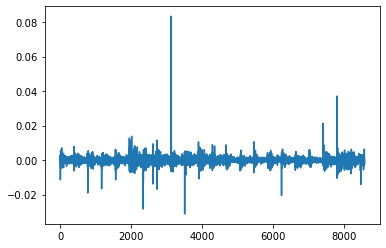

In [96]:
import matplotlib.pyplot as plt
numpy_verAAPL = pd.DataFrame.to_numpy(data_vers["AAPL"]).reshape(1,8580)
numpy_verMSFT = pd.DataFrame.to_numpy(data_vers["MSFT"]).reshape(1,8580)
numpy_verAMZN = pd.DataFrame.to_numpy(data_vers["AMZN"]).reshape(1,8580)
numpy_verFB = pd.DataFrame.to_numpy(data_vers["FB"]).reshape(1,8580)
numpy_verTSLA = pd.DataFrame.to_numpy(data_vers["TSLA"]).reshape(1,8580)
top_five = np.vstack((numpy_verAAPL, numpy_verMSFT, numpy_verAMZN, numpy_verFB, numpy_verTSLA))


def ts_delay(var, days):
    if days > 0:
        rolled = np.roll(var, days)
        rolled[:, :days] = np.nan
        return rolled
    else:
        rolled = np.roll(var, days)
        rolled[:, days:] = np.nan
        return rolled
    
def rev(var, days):
    ret = (var - ts_delay(var, days))/(ts_delay(var, days))
    return -ret

future_returns = (ts_delay(top_five, -1) - top_five)/top_five

correct = (np.sign(rev(top_five, 1) * future_returns)) * abs(future_returns)

summed = np.sum(correct, axis = 0)
plt.plot(summed)
plt.show()

In [95]:
pd.DataFrame.to_numpy(data_vers["AAPL"]).shape

(8580, 1)

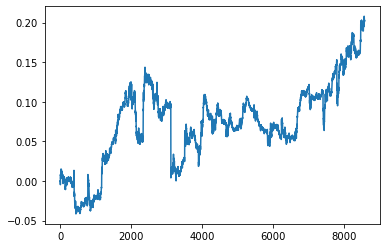

In [103]:
import matplotlib.pyplot as plt
import numpy as np

close = numpy_verAAPL

def returnRev(var, minutes, momentum = False):
    close = var
    if not momentum:
        reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        return np.cumsum(np.nan_to_num(reversion_pnl))
    else:
        reversion = ((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        return np.cumsum(np.nan_to_num(reversion_pnl))
    
def makeAndTestReversion(var, minutes, momentum = False):
    close = var
    if not momentum:
        reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
        plt.show()
    else:
        reversion = ((close - ts_delay(close, minutes))/ts_delay(close, minutes))
        future_returns = (ts_delay(close, -1) - close)/close
        reversion = np.sign(reversion)
        reversion_pnl = reversion * future_returns
        plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
        plt.show()

    
# def makeAndTestMomentum(var, minutes):
#     close = var
#     reversion = -((close - ts_delay(close, minutes))/ts_delay(close, minutes))
#     future_returns = (ts_delay(close, -1) - close)/close
#     reversion = np.sign(reversion)
#     reversion_pnl = reversion * future_returns
#     plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
#     plt.show()
# close = numpy_verAAPL
# reversion = -((close - ts_delay(close, 1))/ts_delay(close, 1)
# future_returns = (ts_delay(close, -1) - close)/close
# reversion = np.sign(reversion)
# reversion_pnl = reversion * future_returns

# plt.plot(np.cumsum(np.nan_to_num(reversion_pnl)))
# plt.show()

# np.cumsum(reversion_pnl).shape
# reversion_pnl.shape
# np.cumsum(reversion_pnl).reshape(1, 8190)
# np.cumsum(reversion_pnl)
                  
# makeAndTestReversion(numpy_verTSLA, 1, True)

# plt.plot(returnRev(numpy_verTSLA, 1, True))
# plt.show()
# numpy_verAAPL = pd.DataFrame.to_numpy(data_vers["AAPL"]).reshape(1,8190)
# numpy_verMSFT = pd.DataFrame.to_numpy(data_vers["MSFT"]).reshape(1,8190)
# numpy_verAMZN = pd.DataFrame.to_numpy(data_vers["AMZN"]).reshape(1,8190)
# numpy_verFB = pd.DataFrame.to_numpy(data_vers["FB"]).reshape(1,8190)
# numpy_verTSLA

# makeAndTestReversion(numpy_verAAPL, 1, True)
# makeAndTestReversion(numpy_verMSFT, 1, True)
# makeAndTestReversion(numpy_verAMZN, 1, False)
#makeAndTestReversion(numpy_verFB, 1, False)
# makeAndTestReversion(numpy_verTSLA, 1, True)

alpha = returnRev(numpy_verAAPL, 1, True) + returnRev(numpy_verMSFT, 1, True) + returnRev(numpy_verAMZN, 1, True) + returnRev(numpy_verFB, 1, True) + returnRev(numpy_verTSLA, 1, True)

plt.plot(alpha)
plt.show()

In [73]:
import math
total = 0
for i in range(100000000):
    a = math.cos(i)
    total += a

KeyboardInterrupt: 